## Candy Crush Exploratory Data Analysis
#### Candy Crush is a free-to-play puzzle game released by King in 2012. 
#### The goal of the game is to match similar candy together to clear the level and progress to the next one. 
#### Candy Crush has more than 3000 levels, and new ones are added every week. 



#### In this project, we will see how we can use data collected from players to estimate level difficulty. 
#### Let's start by loading in the packages we're going to need.

In [1]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import Figure


In [2]:
data = pd.read_csv(r"C:\Users\b5-chen\Python projects\candy_crush_EDA\candy_crush.csv")

In [3]:
df = pd.DataFrame(data)

In [4]:
df.dtypes

player_id       object
dt              object
level            int64
num_attempts     int64
num_success      int64
dtype: object

In [5]:
# convert data type of date column to datetime
df['dt'] = pd.to_datetime(df['dt'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16865 entries, 0 to 16864
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   player_id     16865 non-null  object        
 1   dt            16865 non-null  datetime64[ns]
 2   level         16865 non-null  int64         
 3   num_attempts  16865 non-null  int64         
 4   num_success   16865 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 658.9+ KB


## Checking the data set 
### Now that we have loaded the data set we can check the total number of players in the dataset.

In [7]:
num_players = df['player_id'].nunique()
print("Number of players: {}".format(num_players))

Number of players: 6814


In [8]:
time_period = df['dt'].max() - df['dt'].min()
print("Time period for which we have the data: {}".format(time_period))

Time period for which we have the data: 6 days 00:00:00


## Computing the difficulty level
#### We will determine the difficulty of each level. 
#### We assume the difficult levels require more attempts on average than the easier ones, thus the harder the level is, the lower the probability to pass that level in a single attempt.
#### This can be calculated for each level by: difficulty = Number of wins / Total num of attempts 

In [9]:
grouped_df = df.groupby(['level']) # group the dataframe by level


In [10]:
final = grouped_df[['num_attempts','num_success']].agg('sum') # sum up the num_attempts and num_success columns 


In [11]:
final

,num_attempts,num_success
level,,
1,1322,818
2,1285,666
3,1546,662
4,1893,705
5,6937,634
6,1591,668
7,4526,614
8,15816,641
9,8241,670


In [12]:
final['win_rate'] = final.num_success / final.num_attempts 

In [13]:
final.reset_index(inplace=True)
final

,level,num_attempts,num_success,win_rate
0,1,1322,818,0.618759
1,2,1285,666,0.518288
2,3,1546,662,0.428202
3,4,1893,705,0.372425
4,5,6937,634,0.091394
5,6,1591,668,0.419862
6,7,4526,614,0.135661
7,8,15816,641,0.040529
8,9,8241,670,0.081301
9,10,3282,617,0.187995


## Visualising the difficulty profile on a graph.
#### Plotting the data in a line chart
#### lower value implies higher difficulty

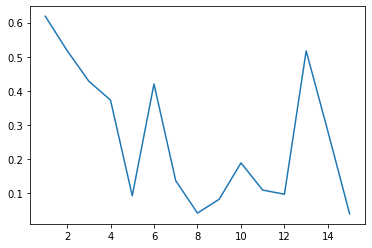

In [14]:
plt.plot(final['level'], final['win_rate'])
plt.show()

#### Calculating the standard error.

In [15]:
final['error_bar'] = np.sqrt(final.win_rate*(1-final.win_rate)/final.num_attempts)
final

,level,num_attempts,num_success,win_rate,error_bar
0,1,1322,818,0.618759,0.013358
1,2,1285,666,0.518288,0.013939
2,3,1546,662,0.428202,0.012585
3,4,1893,705,0.372425,0.011112
4,5,6937,634,0.091394,0.003460
5,6,1591,668,0.419862,0.012373
6,7,4526,614,0.135661,0.005090
7,8,15816,641,0.040529,0.001568
8,9,8241,670,0.081301,0.003011
9,10,3282,617,0.187995,0.006820


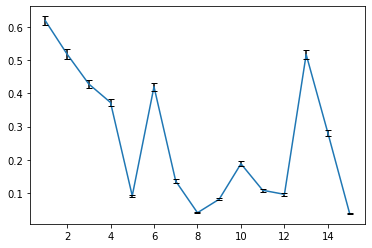

<Figure size 720x432 with 0 Axes>

In [16]:

plt.plot(final['level'], final['win_rate'])
plt.errorbar(final['level'], final['win_rate'], yerr = final['error_bar'], xerr = None, ls='none', capsize=3, color='black') 
plt.figure(figsize=(10,6))
plt.show()

### Likelihood the player will complete the episode in one attempt.

In [17]:
p = np.prod(final.win_rate)
p

9.447140934486065e-12

#### Given the probability calculated, it is very unlikely for a player to complete the episode in one attempt.

### Number of levels player per player

Text(0.5, 0, '# levels played by a player')

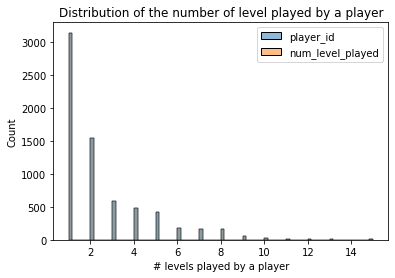

In [18]:
player_df = df[['player_id','level']].groupby(df['player_id']).count()
player_df.rename({'level':'num_level_played'}, inplace=True, axis=1)
sns.histplot(player_df)
plt.title('Distribution of the number of level played by a player')
plt.xlabel("# levels played by a player")


### How many players played given levels 

Text(0, 0.5, 'Number of players')

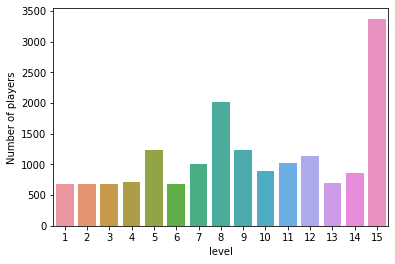

In [19]:
num_player_per_level = df[['level','player_id']].groupby('level').count()
sns.barplot(data=num_player_per_level, x=num_player_per_level.index, y='player_id')
plt.ylabel('Number of players')

In [20]:
level_df = df[['level', 'num_attempts','num_success']].groupby('level').sum()
level_df.head()

,num_attempts,num_success
level,,
1,1322,818
2,1285,666
3,1546,662
4,1893,705
5,6937,634


#### Winning players for each level

In [21]:
winners = df[['level','num_success']].groupby('level').apply(lambda x:(x>0).sum())
level_df['num_winners'] = winners['num_success']

#### Number of player with no successes for each level

In [22]:
losers = df[['level','num_success']].groupby('level').apply(lambda x:(x==0).sum())
level_df['num_losers'] = losers['num_success']

In [23]:
#total number of players
level_df['num_players'] = level_df['num_winners']+level_df['num_losers']

In [24]:
# Average number of attempts to win a level: # attempts/ # success
level_df['attempts_success_ratio'] = level_df['num_attempts']/level_df['num_success'] 

In [25]:
# player_win_lose_ratio: # winning players/ total # players
level_df['player_win_lose_ratio'] = level_df['num_winners']/level_df['num_players']

Text(0.5, 1.0, 'success ratio: # player who succeed/# player who attempts')

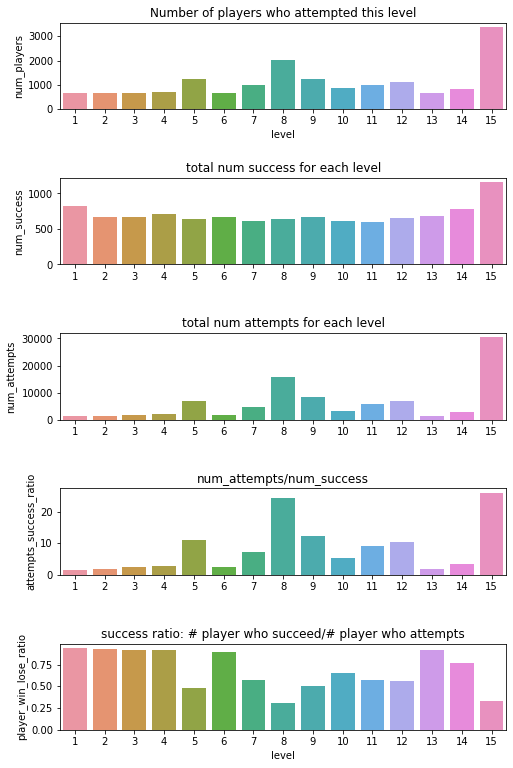

In [26]:
fig, ax = plt.subplots(5,1, figsize=(8,13), gridspec_kw={'hspace':.8})
plt.sca(ax[0])
sns.barplot(data=level_df, x=level_df.index, y='num_players')
plt.title("Number of players who attempted this level")

plt.sca(ax[1])
sns.barplot(data=level_df, x=level_df.index, y='num_success')
plt.title("total num success for each level")
plt.xlabel('')

plt.sca(ax[2])
sns.barplot(data=level_df, x=level_df.index, y='num_attempts')
plt.title("total num attempts for each level")
plt.xlabel('')

plt.sca(ax[3])
sns.barplot(data=level_df, x=level_df.index, y='attempts_success_ratio')
plt.title("num_attempts/num_success")
plt.xlabel('')

plt.sca(ax[4])
sns.barplot(data=level_df, x=level_df.index, y='player_win_lose_ratio')
plt.title("success ratio: # player who succeed/# player who attempts")

In [27]:
level_df.describe()

,num_attempts,num_success,num_winners,num_losers,num_players,attempts_success_ratio,player_win_lose_ratio
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,6223.666667,705.133333,650.533333,473.800000,1124.333333,8.198374,0.684326
std,7739.538088,137.908804,132.248611,611.115631,716.175225,7.922235,0.227162
min,1285.000000,603.000000,574.000000,37.000000,674.000000,1.616137,0.302985
25%,1568.500000,637.500000,598.500000,58.500000,685.500000,2.358542,0.533891
50%,3282.000000,666.000000,629.000000,308.000000,893.000000,5.319287,0.655095
75%,6902.500000,695.500000,638.500000,555.000000,1182.000000,10.681746,0.915440
max,30374.000000,1157.000000,1120.000000,2253.000000,3373.000000,26.252377,0.945428


<AxesSubplot:>

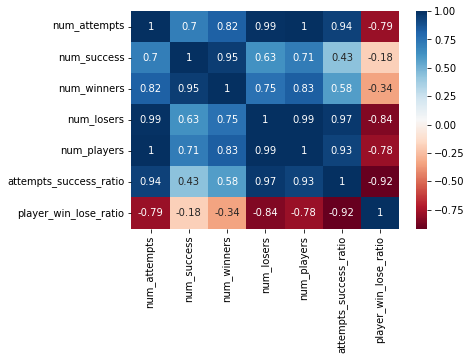

In [28]:
sns.heatmap(level_df.corr(),cmap='RdBu',annot=True)

#### As expected the attempts/success ratio, num_attempts are negatively correlated with player win/loss ratio. Generally the harder levels (low win/loss ratio) reuiqre more attempts to succeed. 
#### lvl 8 and lvl 15 are the hardest levels, and also the most player levels. 
#### number of players on a given levels is rather unequal with minimum of 674 and maximum of 3374 (for lvl 15)     

In [29]:
from sklearn.linear_model import LinearRegression
import statsmodels

In [30]:
temp

NameError: name 'temp' is not defined

<AxesSubplot:xlabel='player_win_lose_ratio', ylabel='num_players'>

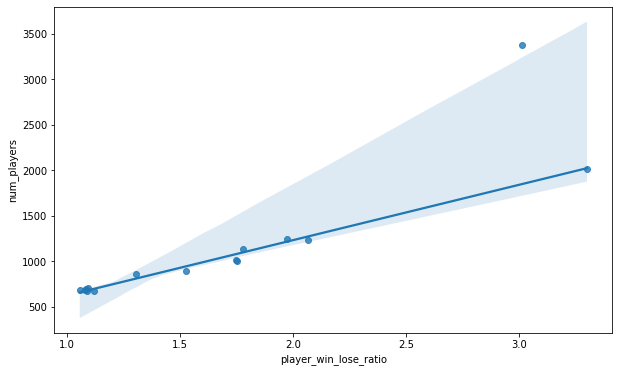

In [ ]:
reg = LinearRegression()
temp = level_df.sort_values(by='player_win_lose_ratio')
y = temp['num_players'].values.reshape(-1,1)
X = temp['player_win_lose_ratio'].values.reshape(-1,1)

sns.regplot(data=level_df, x=1/level_df['player_win_lose_ratio'], y='num_players',order=1,robust=True)

#### there seems to be a linear correlation between win/lose ratio and number of players. We see that the hardest levels (level 8 and 15) have the most number of players. 
#### looking at the correlation graph, lvl 15 appears to be an outlier with 3374 players. My explanation for this is that a player who has successed on a hard level is more likely to share his score to his friends. This will likely entice his friend to attempt this level as well, thus, creating almost a feedback loop.

#### Whilst easier levels are important new players/ casual players, gradually increasing the difficulty provides the player with a sense of accomplishment and progression. As a result, they are more likely to share their results with their peers which leads to potential new playerbases and increased app downloads.

### Profile of players playing hard vs east level

In [31]:
A = df[['player_id','level','num_attempts']].pivot_table(index='player_id',columns='level',values='num_attempts',fill_value=False,aggfunc=(lambda x: np.sum(x)>0))

In [32]:
A.head()

level,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
player_id,,,,,,,,,,,,,,,
000c40d4d19eb434dac94c021352b6cd,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
001a1460e4a6d4a4861e4178277829b5,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False
0021259083355711762f908bd62c6401,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
002c4c82a91b074af731edb962e88e3e,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
002fd5fb305ada06447379f249ee544a,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


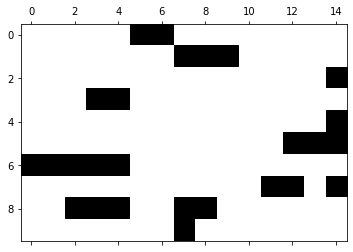

In [33]:
plt.spy(A.values.astype(float)[:10,:])

#### We can see that many players that played the higher levels did not play the lower levels. This could explain why there is a very low win rate for level 15 since mosts player who attempted this level did not practise on the easier level and thus, they are not well versed in the mechanics of the game.